# Spam Detection Dataset EDA

In [13]:
from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_from_disk
from wordcloud import WordCloud


Dataset Loading

In [14]:
dataset = load_from_disk("../spam-detection-dataset")

print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8175
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2725
    })
})


## Balance of the dataset

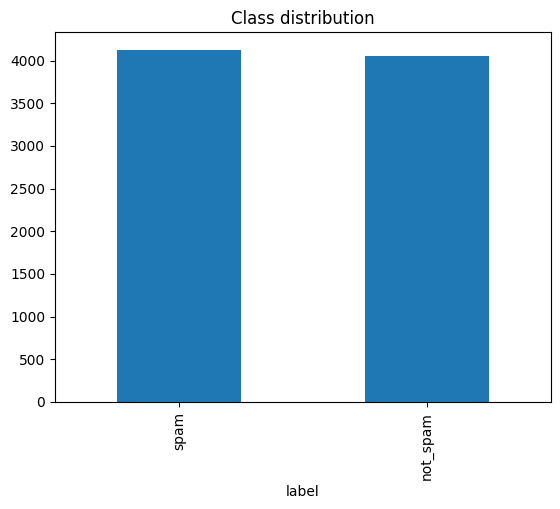

In [15]:
df = dataset["train"].to_pandas()
df["label"].value_counts().plot(kind="bar", title="Class distribution")
plt.show()

## Length of the message

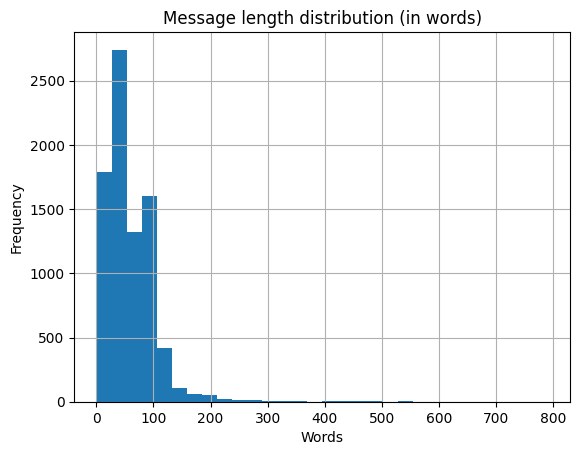

In [16]:
df["length"] = df['text'].apply(lambda x: len(x.split()))
df["length"].hist(bins=30)
plt.title("Message length distribution (in words)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Average length for classes

In [17]:
print(df.groupby("label")["length"].describe())

           count       mean        std  min   25%   50%   75%    max
label                                                               
not_spam  4050.0  61.402222  57.076127  1.0  28.0  46.0  75.0  791.0
spam      4125.0  58.556848  32.478777  3.0  31.0  49.0  94.0  115.0


## Wordcloud for classes

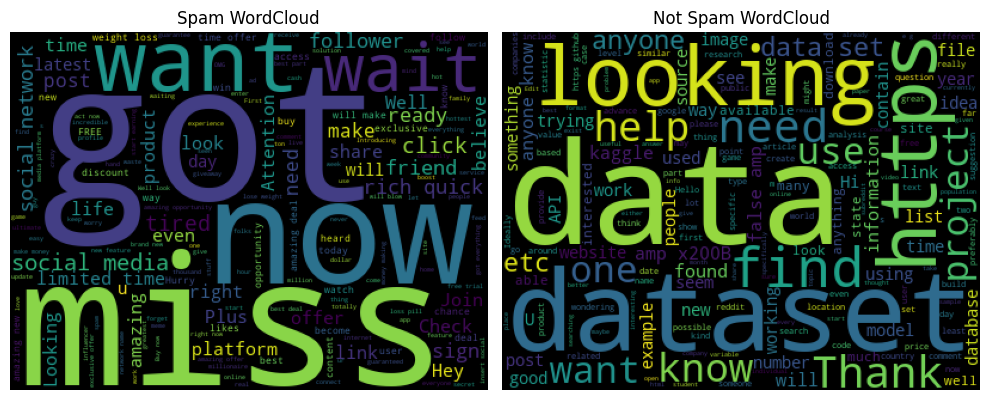

In [18]:
spam_text = " ".join(df[df["label"] == "spam"]["text"])
not_spam_text = " ".join(df[df["label"] == "not_spam"]["text"])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=400, height=300).generate(spam_text))
plt.axis("off")
plt.title("Spam WordCloud")

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=400, height=300).generate(not_spam_text))
plt.axis("off")
plt.title("Not Spam WordCloud")

plt.tight_layout()
plt.show()

## Examples of texts

In [19]:
print("=== SPAM ===")
print(df[df["label"] == "spam"]["text"].sample(3, random_state=42).values)

print("\n=== NOT SPAM ===")
print(df[df["label"] == "not_spam"]["text"].sample(3, random_state=42).values)

=== SPAM ===
["Get rich quick with this amazing new app! Sign up now and start making money with just a few clicks. Don't miss out on this opportunity to become a millionaire overnight!\n\n"
 '"Dewdzzz, check out this amaaaazing deal I found for you!! 😮💸💰 Get THREE MONTHS of premium membership for the price of ONE! Don\'t miss out on this sick offer, it\'ll be gone in a flash! 😱🏃\u200d♂️🔥 Plus, we\'ve got some sick new features you won\'t wanna miss out on. Come join the cool kids and upgrade to premium now! 🤑🙌 #premium #deal #limitedtimeonly #upgrade #coolkids"\n\nUgh, sorry guys, I can\'t keep up this char'
 '"Amazing Offer! Get rich quick with just one click! Don\'t waste your time with boring jobs or education, become a millionaire overnight with our exclusive system! No experience or skills required! Just sign up now and start earning big bucks!"\n\n']

=== NOT SPAM ===
['Hello, I am looking for some retinal fundus image datasets for a deep learning project. I found some for myopi